- Players A and B match pennies N times
- They keep a tally of their gains and losses
- *After the first toss, what is the chance that at no time during the game will they be even?*

____

**Note**: *"It is played between two players, Even and Odd. Each player has a penny and must secretly turn the penny to heads or tails. The players then reveal their choices simultaneously. If the pennies match (both heads or both tails), then Even keeps both pennies, so wins one from Odd (+1 for Even, −1 for Odd). If the pennies do not match (one heads and one tails) Odd keeps both pennies, so receives one from Even (−1 for Even, +1 for Odd)."*

- After the first toss, there are two possibilities
    1. A ahead by 1
    2. B ahead by 1
    
- They have $N-1$ tosses remaining

- Let's consider the possible paths when $N=3$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [4]:
array_flips = (np.array([-1, 1]),)*3
array_permutations = np.meshgrid(*array_flips)

In [14]:
df_paths = pd.DataFrame([x.ravel() for x in array_permutations]).cumsum()

In [15]:
df_paths

,0,1,2,3,4,5,6,7
0,-1,-1,1,1,-1,-1,1,1
1,-2,-2,0,0,0,0,2,2
2,-3,-1,-1,1,-1,1,1,3


- As we can see, the probability of reaching a tie at some point is 1/2

- Let's try $N=6$

In [17]:
array_flips = (np.array([-1, 1]),)*6
array_permutations = np.meshgrid(*array_flips)
df_paths = pd.DataFrame([x.ravel() for x in array_permutations]).cumsum()

In [23]:
len([x for x in df_paths.columns if (df_paths[x]==0).sum()>=1]),len(df_paths.columns)

(44, 64)

- For $N=6$, the probability is 11/16
    - **As we can see, the probability isn't just 1/2**

- Since each coin flip has two possible outcomes, there are $2^{N}$ different paths the game can take

- Let's visualize the simulated probabilities for different $N$ values

In [76]:
def sim(N, n_trials):
    array_flips = np.random.randint(0, 2, size=(N, 2, n_trials))
    array_sum = np.sum(array_flips, axis=1)
    array_boolean = (array_sum == 1).astype(int)
    array_score = np.cumsum(array_boolean + (-1 + array_boolean), axis=0)
    array_results = (np.sum(array_score == 0, axis=0)>0).astype(int)
    return np.mean(array_results)

In [87]:
n_trials = 100000
x = []
list_results = []

for N in range(2, 100):
    x.append(N)
    list_results.append(sim(N, n_trials))

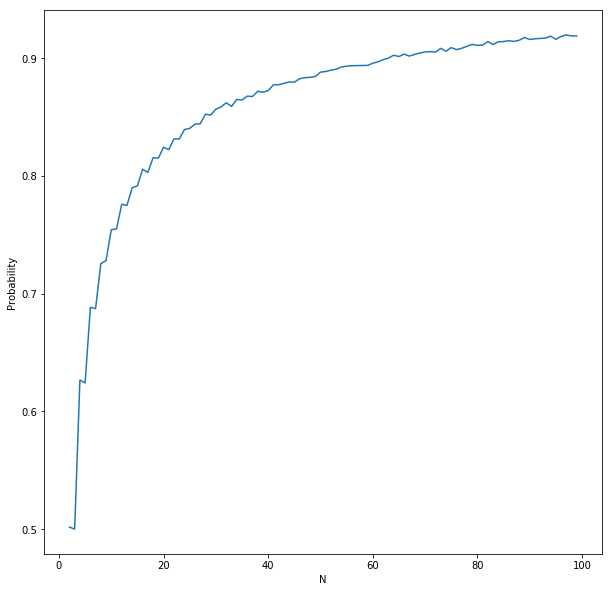

In [88]:
plt.plot(x, list_results)
plt.xlabel('N')
plt.ylabel('Probability')
plt.show()